In [1]:
### Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
import networkx as nx
import time
import random
import csv
%matplotlib inline

In [2]:
G = nx.read_edgelist("./EDGES_FILE.csv", create_using=nx.DiGraph)
H = nx.read_edgelist("./EDGES_FILE.csv", create_using=nx.DiGraph)

In [3]:
len(list(G.nodes()))

956

In [4]:
nodes = []
for (x, y) in G.edges():
    if(x == y):
        if(H.has_node(x)):
            nodes.append(x)
            H.remove_node(x)

In [5]:
len(list(H.nodes()))

765

In [6]:
G = H
nx.is_weakly_connected(G)

True

In [7]:
i_time = time.time()
bet = nx.degree(G)
print(f"Calculated scores in: {time.time() - i_time}")

Calculated scores in: 0.0003414154052734375


In [8]:
bet_l = []
max_v = max(dict(bet).values())
min_v = min(dict(bet).values())
for i in sorted(list(map(lambda x: int(x), list(G.nodes())))):
    bet_norm = (bet[str(i)] - min_v) / (max_v - min_v) 
    bet_l.append(bet_norm)

In [9]:
obj = pd.read_pickle("./AVPRA_pred.pickled")

### Heterogeneous

In [10]:
node_labels = []
for bet_v in bet_l:
    start_val = 0.0001
    i = 1
    while(True):
        if bet_v <= start_val:
            node_labels.append(i)
            break
        else:
            i += 1
            start_val *= 1.5

In [11]:
pd.Series(node_labels).value_counts()

22    140
21    140
20    111
19    102
23     80
18     59
17     33
16     29
15     24
24     19
13      9
14      8
12      3
11      3
9       3
1       2
dtype: int64

In [12]:
### Random forest classifier creation with 70 trees
clf = RandomForestClassifier(n_estimators=70)
f1_scores = []
for res in obj:
    start_time = time.time()
    
    X_data = list(map(lambda x: sorted(x, reverse=True), res[1]))
    X_data = [X_data[i] for i in range(len(X_data)) if str(i + 1) not in nodes]
    y_data = node_labels

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    ### Accuracy metric
    f1_scores.append(metrics.f1_score(y_test, y_pred, average="micro"))
    print(f"Iteration completed in {time.time() - start_time}")

Iteration completed in 0.08848118782043457
Iteration completed in 0.1274862289428711
Iteration completed in 0.17061805725097656
Iteration completed in 0.16089749336242676
Iteration completed in 0.16954493522644043
Iteration completed in 0.13241887092590332
Iteration completed in 0.1458730697631836
Iteration completed in 0.14942669868469238
Iteration completed in 0.14631438255310059
Iteration completed in 0.1571044921875
Iteration completed in 0.17908120155334473
Iteration completed in 0.14454293251037598
Iteration completed in 0.13782429695129395
Iteration completed in 0.13397002220153809
Iteration completed in 0.14383673667907715
Iteration completed in 0.13296747207641602
Iteration completed in 0.1445930004119873
Iteration completed in 0.13296747207641602
Iteration completed in 0.1444547176361084
Iteration completed in 0.1603870391845703
Iteration completed in 0.16507482528686523


### Heterogeneous 2

In [13]:
node_labels = []
for bet_v in bet_l:
    ok = False
    for i in range(1, 11):
        if(bet_v <= 0.005 * i): 
            node_labels.append(i)
            ok = True
            break
    if ok: continue
    for i in range(1, 6):
        if(bet_v <= 0.05 + 0.01 * i):
            node_labels.append(10 + i)
            ok = True
            break
    if ok: continue
    if(bet_v <= 0.2):
        node_labels.append(16)
        continue
    node_labels.append(17)

In [14]:
pd.Series(node_labels).value_counts()

17    409
16    178
14     27
13     20
11     17
5      17
12     13
15     13
3      12
8      12
7      11
9       8
1       8
6       7
10      5
4       5
2       3
dtype: int64

In [15]:
### Random forest classifier creation with 70 trees
clf = RandomForestClassifier(n_estimators=70)
f1_scores2 = []
for res in obj:
    start_time = time.time()
     
    X_data = list(map(lambda x: sorted(x, reverse=True), res[1]))
    X_data = [X_data[i] for i in range(len(X_data)) if str(i + 1) not in nodes]
    y_data = node_labels

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    ### Accuracy metric
    f1_scores2.append(metrics.f1_score(y_test, y_pred, average="micro"))
    print(f"Iteration completed in {time.time() - start_time}")

Iteration completed in 0.0835413932800293
Iteration completed in 0.10626816749572754
Iteration completed in 0.13497138023376465
Iteration completed in 0.13745522499084473
Iteration completed in 0.1389622688293457
Iteration completed in 0.13899493217468262
Iteration completed in 0.1444227695465088
Iteration completed in 0.15592527389526367
Iteration completed in 0.17314958572387695
Iteration completed in 0.15012145042419434
Iteration completed in 0.14313507080078125
Iteration completed in 0.13792800903320312
Iteration completed in 0.13699579238891602
Iteration completed in 0.13801908493041992
Iteration completed in 0.1388227939605713
Iteration completed in 0.1370227336883545
Iteration completed in 0.13485264778137207
Iteration completed in 0.1378617286682129
Iteration completed in 0.15678811073303223
Iteration completed in 0.16089272499084473
Iteration completed in 0.15274405479431152


In [16]:
max(f1_scores), (list(range(0, 10)) + list(range(10, 32, 2)))[f1_scores.index(max(f1_scores))]

(0.2875816993464052, 2)

In [17]:
max(f1_scores2), (list(range(0, 10)) + list(range(10, 32, 2)))[f1_scores2.index(max(f1_scores2))]

(0.6601307189542484, 1)

### Graphs creation

In [18]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False
})

In [19]:
plt.figure(figsize=(10, 6))
l = list(range(0, 10)) + list(range(10, 32, 2))
plt.plot(l, f1_scores, "o", label="F1-score intervalli [a]", markersize=10)
plt.plot(l, f1_scores2, "o", label="F1-score intervalli [b]", markersize=10)

plt.xlabel("Iterazione", fontsize=22)
plt.ylabel("F1-score", fontsize=22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(0, 1)

plt.legend(loc="upper right", prop={'size': 16})

plt.savefig("Micro_comparison_Degree.png", dpi=500)
plt.show()

/tmp/ipykernel_22331/2006543703.py:17: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


/tmp/ipykernel_11410/3195118710.py:14: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


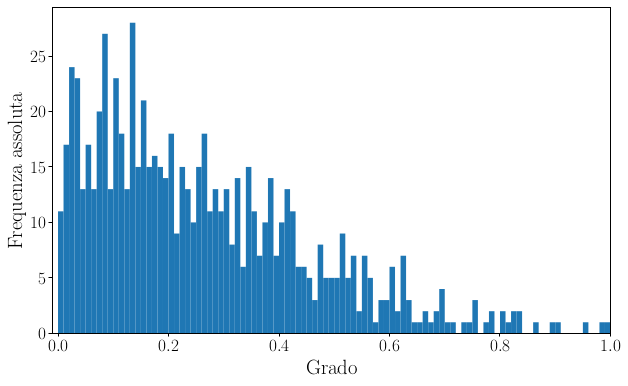

In [82]:
### Degree distrib function
serie = pd.Series(bet_l)
plt.figure(figsize=(10, 6))
plt.hist(serie, 100)
plt.xlabel("Grado", fontsize=22)
plt.ylabel("Frequenza assoluta", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(-0.01, 1)

plt.savefig("Distribution_distrib_Degree.png", dpi=500)

plt.show()